In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sps
from sklearn.model_selection import train_test_split

In [107]:
n = 1000
m = 100
infinity = 1000000000

theta = sps.uniform.rvs(loc = -3, scale = 6, size=m).T
X = sps.uniform.rvs(loc = -5, scale = 10, size=(n, m)) 
X = pd.DataFrame(X, columns=[str(u) for u in np.arange(m)])
y =  X @ theta + sps.norm.rvs(size=n)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [118]:
def get_errors(X_train, X_test, y_train, y_test):
    theta_est = np.array(np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train)
    return  y_train - X_train @ theta_est.T, y_test - X_test @ theta_est.T
def get_mean_error(errors):
    return np.mean(errors ** 2)
def get_var_error(errors):
    return np.mean(errors**2) - np.sum(errors / len(errors)) ** 2 

In [110]:
tr_errors, tst_errors = get_errors(X_train, X_test, y_train, y_test)
errors_tr = [tr_errors]
errors_tst = [tst_errors]
n_s = [len(X_train.columns)]

In [112]:
while(X_train.shape[1] > 3):
    min_loss = infinity
    tr_errors = []
    tst_errors = []
    worst_col = -100
    for bad_col in X_train.columns:      
        X_train_temp = X_train.drop(bad_col, axis=1)
        X_test_temp = X_test.drop(bad_col, axis=1)
        tr_errors_, tst_errors_ = get_errors(X_train_temp, X_test_temp, y_train, y_test)
        tst_e = get_mean_error(tst_errors_)
        if tst_e < min_loss:
            min_loss = tst_e
            worst_col = bad_col
            tr_errors = tr_errors_
            tst_errors = tst_errors_
    X_train = X_train.drop(worst_col, axis=1)
    X_test = X_test.drop(worst_col, axis=1)
    errors_tr.append(tr_errors)
    errors_tst.append(tst_errors)
    n_s.append(len(X_train.columns))
    if n_s[-1] % 10 == 0:
        print(n_s[-1])

90
80
70
60
50
40
30
20
10


In [113]:
len(n_s), len(errors_tr)

(98, 98)

In [134]:
def get_errors(errors, title):
    plt.figure(figsize=(10, 10))
    mean_errors = np.array([get_mean_error(u) for u in errors])
    var_errors = np.array([get_var_error(u) for u in errors])
    plt.title(title)
    plt.xlabel('number of features')
    plt.ylabel('MSE')
    plt.fill_between(n_s, mean_errors + var_errors, mean_errors - var_errors, alpha = 0.2)
    plt.plot(n_s, mean_errors)

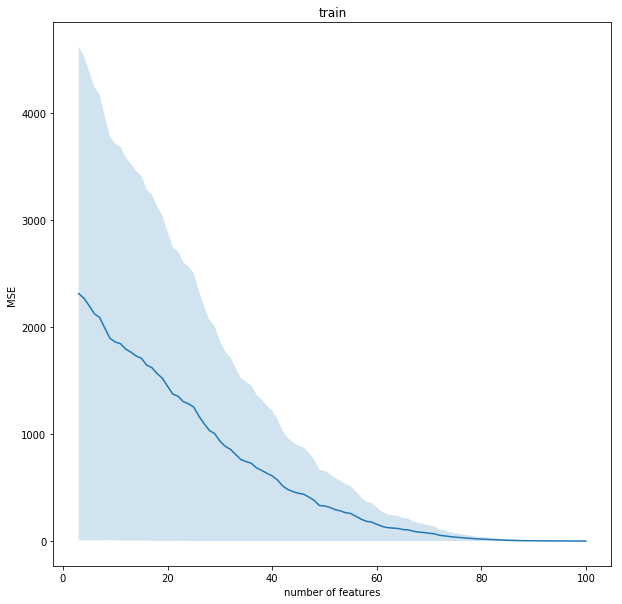

In [136]:
get_errors(errors_tr, 'train')

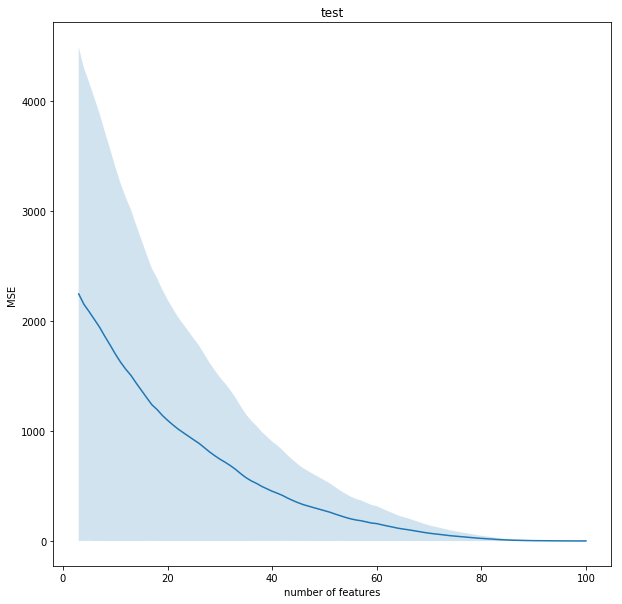

In [137]:
get_errors(errors_tst, 'test')

Можем заметить, что для test качество спадает с уменьшением числа признаков довольно стабильно, в то же время для 
train наблюдааются некоторые скачки. Это логично: убирая признаки, мы старались сделать так, чтобы оценка на test при удалении признаков увеличивалась минимально быстро. Разумеется, отбор признаков стоило бы делать на validate, но мы бы все равно увидели на тестовой выборке такие же неровности, как и на train. 